# Model 3: K Nearest Neighbors

In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import os
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("Resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
selected_features = df[["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec",
                        "koi_period", "koi_period_err1", "koi_period_err2", "koi_time0bk", "koi_time0bk_err1",
                        "koi_steff_err2", "koi_slogg", "koi_slogg_err1", "koi_slogg_err2", "koi_srad", "koi_srad_err1",
                        "koi_srad_err2", "ra", "dec", "koi_kepmag"]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
X = selected_features
y = df["koi_disposition"]
print(X.shape, y.shape)

(6991, 19) (6991,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale your data

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    model3 = KNeighborsClassifier(n_neighbors=k)
    model3.fit(X_train_scaled, y_train)
    train_score = model3.score(X_train_scaled, y_train)
    test_score = model3.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.812
k: 3, Train/Test Score: 0.912/0.826
k: 5, Train/Test Score: 0.888/0.825
k: 7, Train/Test Score: 0.874/0.823
k: 9, Train/Test Score: 0.863/0.827
k: 11, Train/Test Score: 0.860/0.826
k: 13, Train/Test Score: 0.858/0.825
k: 15, Train/Test Score: 0.853/0.830
k: 17, Train/Test Score: 0.852/0.827
k: 19, Train/Test Score: 0.850/0.828


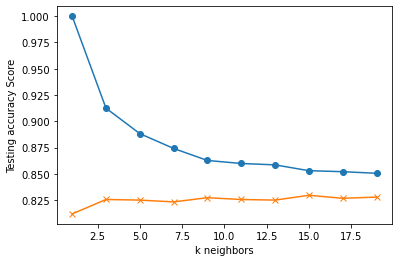

In [10]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("Images/KNN_testing_acc_score.jpg")
plt.show()

In [11]:
# Note that k: 15 seems to be the best choice for this dataset
model3 = KNeighborsClassifier(n_neighbors=15)
model3.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % model3.score(X_test_scaled, y_test))

k=15 Test Acc: 0.830


In [12]:
# print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'p': [1, 3, 6],
              'n_neighbors': [15, 30, 60]}
grid3 = GridSearchCV(model3, param_grid, verbose=3)

In [14]:
# Train the model with GridSearch
grid3.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_neighbors=15, p=1 .............................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] ................. n_neighbors=15, p=1, score=0.847, total=   0.3s
[CV] n_neighbors=15, p=1 .............................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV] ................. n_neighbors=15, p=1, score=0.821, total=   0.3s
[CV] n_neighbors=15, p=1 .............................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[CV] ................. n_neighbors=15, p=1, score=0.839, total=   0.3s
[CV] n_neighbors=15, p=1 .............................................
[CV] ................. n_neighbors=15, p=1, score=0.832, total=   0.3s
[CV] n_neighbors=15, p=1 .............................................
[CV] ................. n_neighbors=15, p=1, score=0.836, tot

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=15),
             param_grid={'n_neighbors': [15, 30, 60], 'p': [1, 3, 6]},
             verbose=3)

In [15]:
print(grid3.best_params_)
print(grid3.best_score_)

{'n_neighbors': 30, 'p': 1}
0.840547886391256


# Save the Model

In [16]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'ey_knn_model.sav'
joblib.dump(model3, filename)

['ey_knn_model.sav']